# Champion Analysis v1.3 - Paperclip Prototype
*This notebook is a prototype for the Champion Analysis notebook. It is not meant to be used for the final product.*
*The purpose of this prototype is to combine different aspects of the previous prototypes into one notebook to create a more cohesive and complete analysis of the data, along with visualizations to prepare for presentation.*

In [30]:
# Dependencies and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import requests
import json
import hvplot.pandas
import seaborn as sns

## Data Collection and Refinement
*In this chapter, we collect the necessary data from the PokeAPI and save them into a DataFrame, refining it accordingly to prepare for proper analysis and visualization.*

### Collection

In [31]:
# Initialize a dictionary to store your data
pokemon_data = {
    "name": [],
    "type": [],
    "hp": [],
    "attack": [],
    "defense": [],
    "special_attack": [],
    "special_defense": [],
    "speed": [],
    "height": [],
    "weight": [],
    "legendary": [],
    "mythical": []
}

# Loop through every available Pokemon
for i in range(1, 899):
    # Send a request to the PokeAPI
    response = requests.get(f"https://pokeapi.co/api/v2/pokemon/{i}").json()

    # Send a request to the Pokemon Species endpoint
    species_response = requests.get(f"https://pokeapi.co/api/v2/pokemon-species/{i}").json()

    # Extract the Pokemon's name
    pokemon_data["name"].append(response["name"])

    # Extract the Pokemon's types
    types = [type_info["type"]["name"] for type_info in response["types"]]
    pokemon_data["type"].append(types)

    # Extract the Pokemon's stats
    stats = {stat_info["stat"]["name"]: stat_info["base_stat"] for stat_info in response["stats"]}
    pokemon_data["hp"].append(stats.get("hp"))
    pokemon_data["attack"].append(stats.get("attack"))
    pokemon_data["defense"].append(stats.get("defense"))
    pokemon_data["special_attack"].append(stats.get("special-attack"))
    pokemon_data["special_defense"].append(stats.get("special-defense"))
    pokemon_data["speed"].append(stats.get("speed"))
    pokemon_data["height"].append(response["height"])
    pokemon_data["weight"].append(response["weight"])

    # Add the Pokemon's legendary and mythical status
    pokemon_data["legendary"].append(species_response["is_legendary"])
    pokemon_data["mythical"].append(species_response["is_mythical"])


# Create a DataFrame from the dictionary
pokemon_df = pd.DataFrame(pokemon_data)


### Refinement

In [32]:
# Fix height and weight units
# Convert decimeters to inches (1 decimeter = 3.93701 inches)
pokemon_df['height'] = (pokemon_df['height'] * 3.93701).round(2)
# Convert hectograms to pounds (1 hectogram = 0.220462 pounds)
pokemon_df['weight'] = (pokemon_df['weight'] * 0.220462).round(2)

In [33]:
pokemon_df

,name,type,hp,attack,defense,special_attack,special_defense,speed,height,weight,legendary,mythical
0,bulbasaur,"[grass, poison]",45,49,49,65,65,45,27.56,15.21,False,False
1,ivysaur,"[grass, poison]",60,62,63,80,80,60,39.37,28.66,False,False
2,venusaur,"[grass, poison]",80,82,83,100,100,80,78.74,220.46,False,False
3,charmander,[fire],39,52,43,60,50,65,23.62,18.74,False,False
4,charmeleon,[fire],58,64,58,80,65,80,43.31,41.89,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
893,regieleki,[electric],80,100,50,100,50,200,47.24,319.67,True,False
894,regidrago,[dragon],200,100,50,100,50,80,82.68,440.92,True,False
895,glastrier,[ice],100,145,130,65,110,30,86.61,1763.70,True,False
896,spectrier,[ghost],100,65,60,145,80,130,78.74,98.11,True,False


In [34]:
# Separate Types into Primary and Secondary
pokemon_df["primary_type"] = pokemon_df["type"].apply(lambda x: x[0])
pokemon_df["secondary_type"] = pokemon_df["type"].apply(lambda x: x[1] if len(x) > 1 else None)

In [35]:
# Combine Legendary and Mythical into a single column
pokemon_df["legendary/mythical"] = pokemon_df["legendary"].apply(lambda x: "Legendary" or "Mythical" if x else "Regular")

In [36]:
# Drop Unnecessary Columns and Reorder
pokemon_df = pokemon_df[["name", "primary_type", "secondary_type", "hp", "attack", "defense", "special_attack", "special_defense", "speed", "height", "weight", "legendary/mythical"]]

# Capitalize Pokemon Names and Types
pokemon_df["name"] = pokemon_df["name"].str.capitalize()
pokemon_df["primary_type"] = pokemon_df["primary_type"].str.capitalize()
pokemon_df["secondary_type"] = pokemon_df["secondary_type"].str.capitalize()

C:\Users\WolfA\AppData\Local\Temp\ipykernel_19200\3651456303.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pokemon_df["name"] = pokemon_df["name"].str.capitalize()
C:\Users\WolfA\AppData\Local\Temp\ipykernel_19200\3651456303.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pokemon_df["primary_type"] = pokemon_df["primary_type"].str.capitalize()
C:\Users\WolfA\AppData\Local\Temp\ipykernel_19200\3651456303.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

In [50]:
# Display DataFrame before refinement
pokemon_df

,Name,Primary Type,Secondary Type,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Height (in),Weight (lbs),legendary/mythical
0,Bulbasaur,Grass,Poison,45,49,49,65,65,45,27.56,15.21,Regular
1,Ivysaur,Grass,Poison,60,62,63,80,80,60,39.37,28.66,Regular
2,Venusaur,Grass,Poison,80,82,83,100,100,80,78.74,220.46,Regular
3,Charmander,Fire,None,39,52,43,60,50,65,23.62,18.74,Regular
4,Charmeleon,Fire,None,58,64,58,80,65,80,43.31,41.89,Regular
...,...,...,...,...,...,...,...,...,...,...,...,...
893,Regieleki,Electric,None,80,100,50,100,50,200,47.24,319.67,Legendary
894,Regidrago,Dragon,None,200,100,50,100,50,80,82.68,440.92,Legendary
895,Glastrier,Ice,None,100,145,130,65,110,30,86.61,1763.70,Legendary
896,Spectrier,Ghost,None,100,65,60,145,80,130,78.74,98.11,Legendary


In [51]:
# Rename all columns
pokemon_df = pokemon_df.rename(columns={"name": "Name",
                                        "primary_type": "Primary Type",
                                        "secondary_type": "Secondary Type",
                                        "hp": "HP",
                                        "attack": "Attack",
                                        "defense": "Defense",
                                        "special_attack": "Sp. Atk",
                                        "special_defense": "Sp. Def",
                                        "speed": "Speed",
                                        "height": "Height (in)",
                                        "weight": "Weight (lbs)",
                                        "legendary/mythical": "Status"})
# Display DataFrame after refinement
pokemon_df


,Name,Primary Type,Secondary Type,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Height (in),Weight (lbs),Status
0,Bulbasaur,Grass,Poison,45,49,49,65,65,45,27.56,15.21,Regular
1,Ivysaur,Grass,Poison,60,62,63,80,80,60,39.37,28.66,Regular
2,Venusaur,Grass,Poison,80,82,83,100,100,80,78.74,220.46,Regular
3,Charmander,Fire,None,39,52,43,60,50,65,23.62,18.74,Regular
4,Charmeleon,Fire,None,58,64,58,80,65,80,43.31,41.89,Regular
...,...,...,...,...,...,...,...,...,...,...,...,...
893,Regieleki,Electric,None,80,100,50,100,50,200,47.24,319.67,Legendary
894,Regidrago,Dragon,None,200,100,50,100,50,80,82.68,440.92,Legendary
895,Glastrier,Ice,None,100,145,130,65,110,30,86.61,1763.70,Legendary
896,Spectrier,Ghost,None,100,65,60,145,80,130,78.74,98.11,Legendary


In [53]:
# Export new DataFrame to CSV
pokemon_df.to_csv("Extractions/Refined Pokemon Roster.csv", index=False, header=True)

# Export new DataFrame to Excel file for good measure
pokemon_df.to_excel("Extractions/Refined Pokemon Roster.xlsx", index=False, header=True)

## Data Analysis and Visualization
*In this chapter, we analyze the refined data and visualize them as needed to answer the following questions:*
1. *What are the most common types?*
2. *What are the average strongest types in terms of Attack and Special Attack?*
3. *What are the average strongest types in terms of Defense and Special Defense?*
4. *What do Legendary Pokemon look like in terms of stats?*
5. *Which six Pokemon would create the strongest overall team based on their stats?*

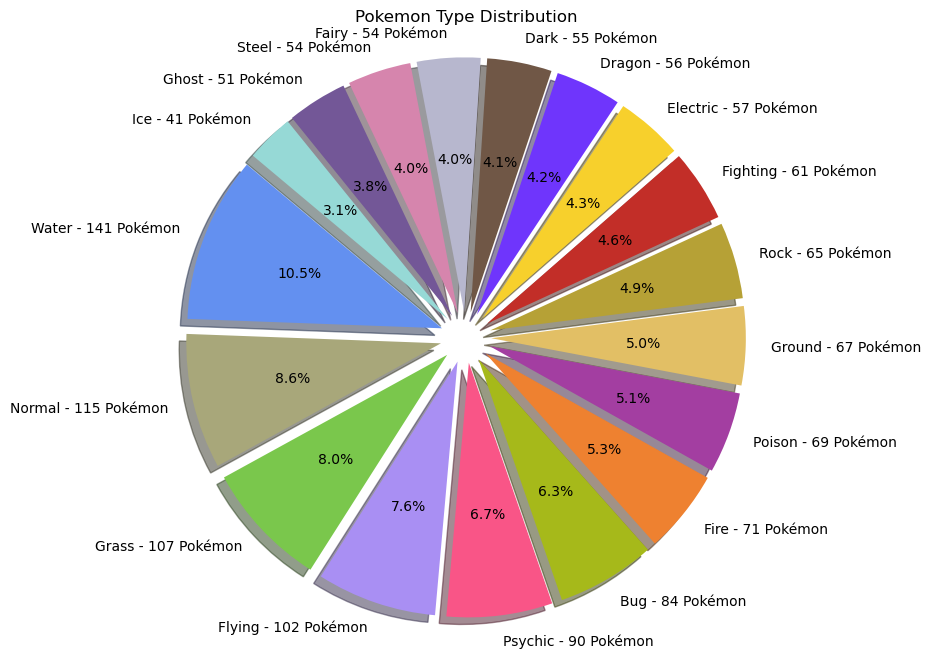

<Figure size 640x480 with 0 Axes>

In [40]:
# Type Distribution Chart
# Concatenate the 'Primary Type' and 'Secondary Type' columns
all_types = pd.concat([pokemon_df['Primary Type'], pokemon_df['Secondary Type']])

# Remove any 'None' values
all_types = all_types[all_types != 'None']

# Get counts for each type
type_counts = all_types.value_counts()
# Define a list of colors
colors = [
    '#6390F0', # Water
    '#A8A77A', # Normal
    '#7AC74C', # Grass
    '#A98FF3', # Flying
    '#F95587', # Psychic
    '#A6B91A', # Bug
    '#EE8130', # Fire
    '#A33EA1', # Poison
    '#E2BF65', # Ground
    '#B6A136', # Rock
    '#C22E28', # Fighting
    '#F7D02C', # Electric
    '#6F35FC', # Dragon
    '#705746', # Dark
    '#B7B7CE', # Steel
    '#D685AD', # Fairy
    '#735797', # Ice
    '#96D9D6' # Ghost
    ]

# Define labels
labels = [f'{label} - {count} Pokémon' for label, count in zip(type_counts.index, type_counts.values)]

# Explode each slice a little bit to make the chart more appealing
explode = [0.1] * len(type_counts)

plt.figure(figsize=(10,8))
plt.pie(type_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, explode=explode, shadow=True)
plt.axis('equal')
plt.title('Pokemon Type Distribution')
plt.show()

# Save Figure
plt.savefig("Visualizations/Pokemon Type Distribution.png")

# Show Figure
plt.show()


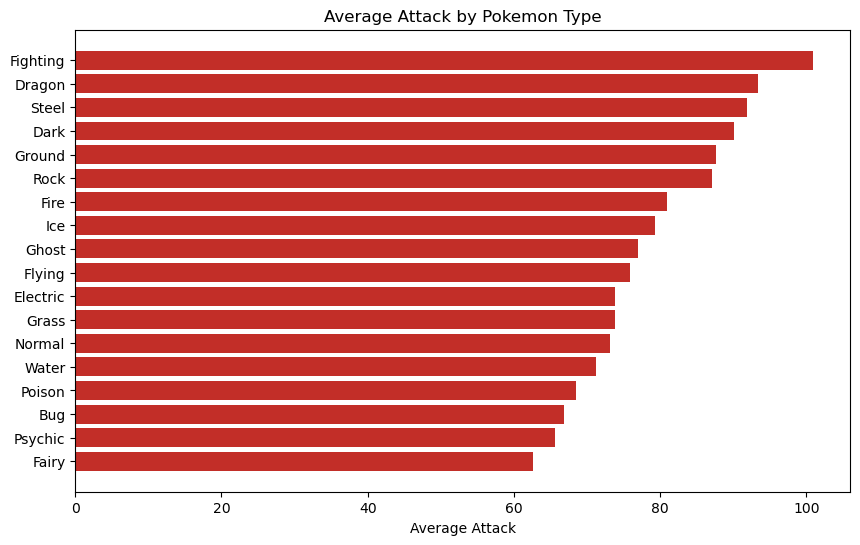

In [41]:
# Attack Distribution Chart
# Melt 'Primary Type' and 'Secondary Type' into one column
melted_df = pd.melt(pokemon_df, id_vars=['Name', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed'], 
                    value_vars=['Primary Type', 'Secondary Type'], 
                    var_name='Type Variable', value_name='Type').dropna()

# Group by 'Type' and calculate mean of 'Attack' for each group
type_attack_means = melted_df.groupby('Type')['Attack'].mean()

# Sort by the mean 'Attack'
type_attack_means = type_attack_means.sort_values()

# Generate a bar plot
plt.figure(figsize=(10, 6))
plt.barh(type_attack_means.index, type_attack_means.values, color='#C22E28')

# Set the title and labels
plt.xlabel('Average Attack')
plt.title('Average Attack by Pokemon Type')

# Save the plot
plt.savefig('Visualizations/Average Attack by Pokemon Type.png')

# Show the plot
plt.show()


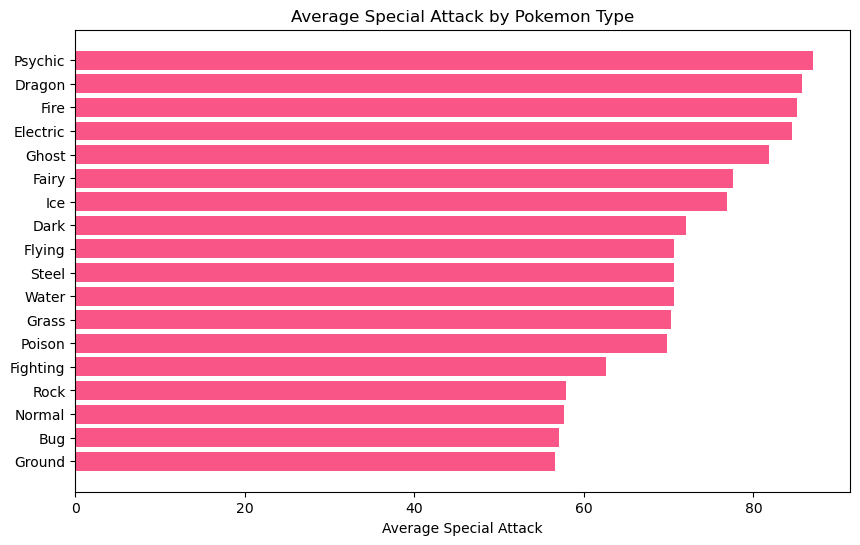

In [42]:
# Special Attack Distribution Chart
# Group by 'Type' and calculate mean of 'Sp. Atk' for each group
type_sp_attack_means = melted_df.groupby('Type')['Sp. Atk'].mean()

# Sort by the mean 'Sp. Atk'
type_sp_attack_means = type_sp_attack_means.sort_values()

# Generate a bar plot
plt.figure(figsize=(10, 6))
plt.barh(type_sp_attack_means.index, type_sp_attack_means.values, color='#F95587')

# Set the title and labels
plt.xlabel('Average Special Attack')
plt.title('Average Special Attack by Pokemon Type')

# Save the plot
plt.savefig('Visualizations/Average Special Attack by Pokemon Type.png')

# Show the plot
plt.show()


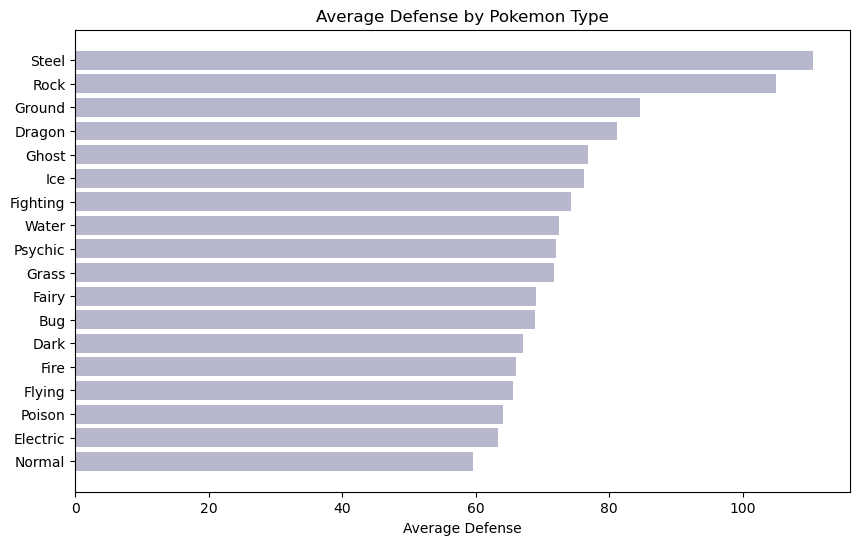

In [43]:
# Defense Distribution Chart
# Group by 'Type' and calculate mean of 'Defense' for each group
type_defense_means = melted_df.groupby('Type')['Defense'].mean()

# Sort by the mean 'Defense'
type_defense_means = type_defense_means.sort_values()

# Generate a bar plot
plt.figure(figsize=(10, 6))
plt.barh(type_defense_means.index, type_defense_means.values, color='#B7B7CE')

# Set the title and labels
plt.xlabel('Average Defense')
plt.title('Average Defense by Pokemon Type')

# Save the plot
plt.savefig('Visualizations/Average Defense by Pokemon Type.png')

# Show the plot
plt.show()


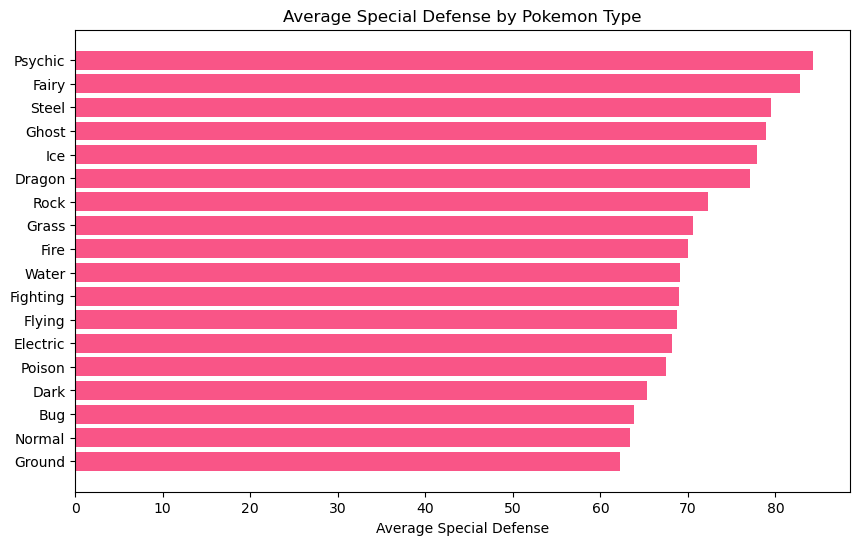

In [44]:
# Special Defense Distribution Chart
# Group by 'Type' and calculate mean of 'Sp. Def' for each group
type_sp_defense_means = melted_df.groupby('Type')['Sp. Def'].mean()

# Sort by the mean 'Sp. Def'
type_sp_defense_means = type_sp_defense_means.sort_values()

# Generate a bar plot
plt.figure(figsize=(10, 6))
plt.barh(type_sp_defense_means.index, type_sp_defense_means.values, color='#F95587')

# Set the title and labels
plt.xlabel('Average Special Defense')
plt.title('Average Special Defense by Pokemon Type')

# Save the plot
plt.savefig('Visualizations/Average Special Defense by Pokemon Type.png')

# Show the plot
plt.show()


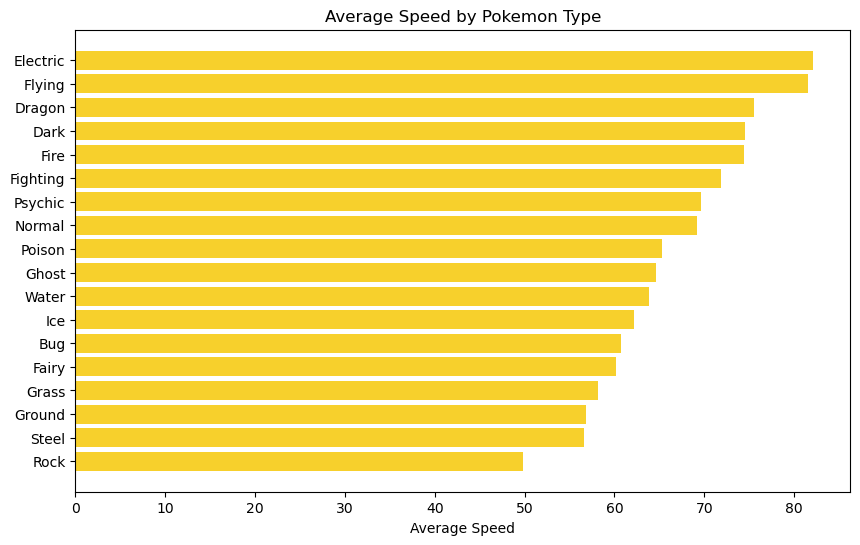

In [45]:
# Speed Distribution Chart
# Group by 'Type' and calculate mean of 'Speed' for each group
type_speed_means = melted_df.groupby('Type')['Speed'].mean()

# Sort by the mean 'Speed'
type_speed_means = type_speed_means.sort_values()

# Generate a bar plot
plt.figure(figsize=(10, 6))
plt.barh(type_speed_means.index, type_speed_means.values, color='#F7D02C')

# Set the title and labels
plt.xlabel('Average Speed')
plt.title('Average Speed by Pokemon Type')

# Save the plot
plt.savefig('Visualizations/Average Speed by Pokemon Type.png')

# Show the plot
plt.show()

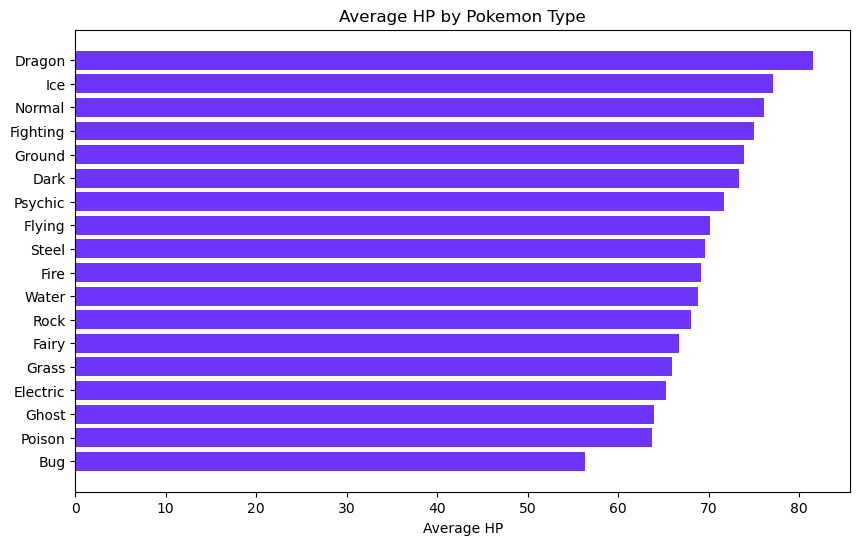

In [46]:
# HP Distribution Chart
# Group by 'Type' and calculate mean of 'HP' for each group
type_hp_means = melted_df.groupby('Type')['HP'].mean()

# Sort by the mean 'HP'
type_hp_means = type_hp_means.sort_values()

# Generate a bar plot
plt.figure(figsize=(10, 6))
plt.barh(type_hp_means.index, type_hp_means.values, color='#6F35FC')

# Set the title and labels
plt.xlabel('Average HP')
plt.title('Average HP by Pokemon Type')

# Save the plot
plt.savefig('Visualizations/Average HP by Pokemon Type.png')

# Show the plot
plt.show()

C:\Users\WolfA\AppData\Local\Temp\ipykernel_19200\859580105.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = pokemon_df.corr()


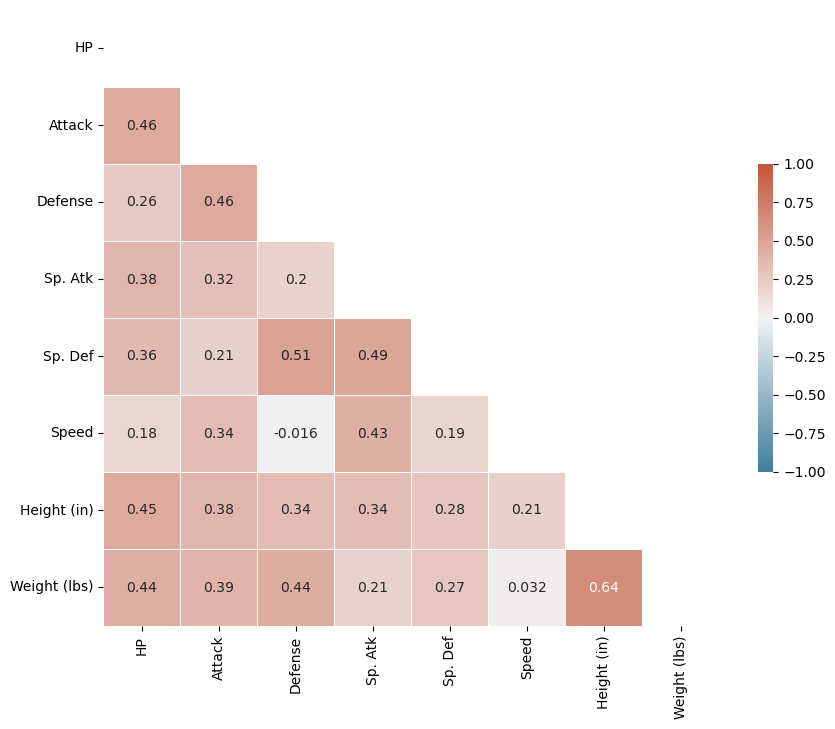

In [47]:
# Correlation Heatmap
# Calculate the correlation matrix

corr = pokemon_df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, annot=True, vmin=-1, vmax=1, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Save the plot
plt.savefig('Visualizations/Correlation Heatmap.png')

# Show the plot
plt.show()

In [49]:
# Determine the strongest Legendary and Non-Legendary Pokemon
# Group by 'Legendary' and calculate mean of 'Total' for each group
legendary_means = pokemon_df.groupby('Legendary/Mythical')['Total'].mean()

# Sort by the mean 'Total'
legendary_means = legendary_means.sort_values()

# Generate a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(legendary_means.index, legendary_means.values, color='#F7D02C')

# Set the title and labels
plt.xlabel('Legendary/Mythical')
plt.ylabel('Average Total')
plt.title('Average Total by Legendary Status')

# Save the plot
plt.savefig('Visualizations/Average Total by Legendary Status.png')

# Show the plot
plt.show()


KeyError: 'Legendary/Mythical'

*Visualization Result: The most common type of Pokemon is Water, followed by Normal and Grass. The strongest types in terms of average Attack and Special Attack are Fighting and Psychic, respectively. The strongest types in terms of average Defense and Special Defense are Steel and Psychic, respectively. The strongest types in terms of average Speed and Health are Electric and Dragon, respectively. Legendary Pokemon tend to have much higher total stat counts than non-Legendary Pokemon. The strongest overall team would consist of a Fighting, Psychic, Steel, Electric, Dragon, and an extra Pokemon of any aforementioned type.*